In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
dataframe= pd.read_csv('./StudentsPerformance.csv')

#### Checking for NaN value in the dataframe

In [86]:
dataframe.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### Observations :
- There are no NaN values in the dataframe, therefore, no data cleaning is required.

#### Checking for duplicates in the dataframe

In [87]:
dataframe.duplicated().sum()

0

##### Observations :
- There is no duplicated row in the dataframe.

#### General information about dataframe

In [88]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [89]:
dataframe.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

##### Observations :
- There are 3 int64 columns and 5 object columns.
- Here, int64 columns can be treated as numeric columns and object can be referred as categorical columns.

#### Descriptive statistical information

In [90]:
dataframe.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Observations:
- There is nothing out of ordinary in the data as seen from the describe script.

#### Dividing the columns as categorical and numerical for further analysis

In [91]:
categorical_columns= dataframe.select_dtypes(include= 'O')
numerical_columns= dataframe.select_dtypes(exclude= 'O')

#### Unique column values in categorical columns

In [92]:
for column in categorical_columns:
    contents= list(dataframe[column].unique())
    print(column, ':', ', '.join(sorted(contents)))

gender : female, male
race/ethnicity : group A, group B, group C, group D, group E
parental level of education : associate's degree, bachelor's degree, high school, master's degree, some college, some high school
lunch : free/reduced, standard
test preparation course : completed, none


#### Creating new feature in the dataframe

In [93]:
dataframe['total score']= dataframe['math score'] + dataframe['reading score'] + dataframe['writing score']

In [94]:
dataframe['total percentage']= (dataframe['total score']/300).round(2)

In [95]:
dataframe.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,total percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,0.73
1,female,group C,some college,standard,completed,69,90,88,247,0.82
2,female,group B,master's degree,standard,none,90,95,93,278,0.93
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,0.49
4,male,group C,some college,standard,none,76,78,75,229,0.76


In [96]:
check_status= lambda x: 'pass' if x>=0.4 else 'fail'
dataframe['status']= list(map(check_status, dataframe['total percentage']))

In [97]:
dataframe.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,total percentage,status
0,female,group B,bachelor's degree,standard,none,72,72,74,218,0.73,pass
1,female,group C,some college,standard,completed,69,90,88,247,0.82,pass
2,female,group B,master's degree,standard,none,90,95,93,278,0.93,pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,0.49,pass
4,male,group C,some college,standard,none,76,78,75,229,0.76,pass


In [98]:
dataframe.drop(['total score'], axis= 1, inplace= True)

In [99]:
dataframe.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total percentage,status
0,female,group B,bachelor's degree,standard,none,72,72,74,0.73,pass
1,female,group C,some college,standard,completed,69,90,88,0.82,pass
2,female,group B,master's degree,standard,none,90,95,93,0.93,pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.49,pass
4,male,group C,some college,standard,none,76,78,75,0.76,pass


### Finding relations between features

#### gender vs. total percentage

gender vs. total percentage graph with race/ethnicity as a function.

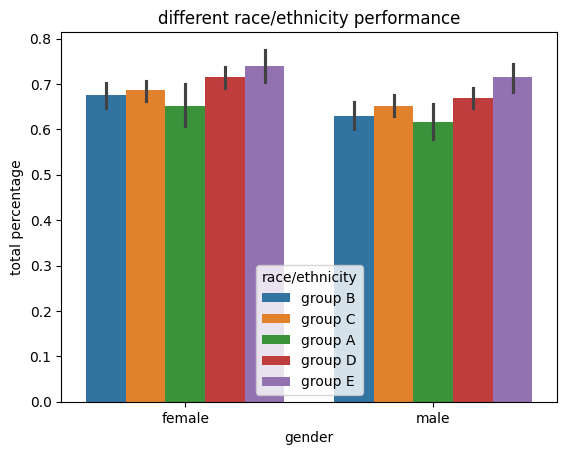

In [166]:
plt.title('different race/ethnicity performance')
sns.barplot(x= dataframe['gender'],
            y= dataframe['total percentage'],
            hue= dataframe['race/ethnicity'],);

##### Observations
- female students have scored more than male students in the examination.
- Group E has performed the best in both the genders.
- Group A has performed the worst in both the genders.
- The comparative performance of all the races in both genders is similar.

#### parental level of education vs. status

parental level of education vs. status with race/ethnicity as a function.

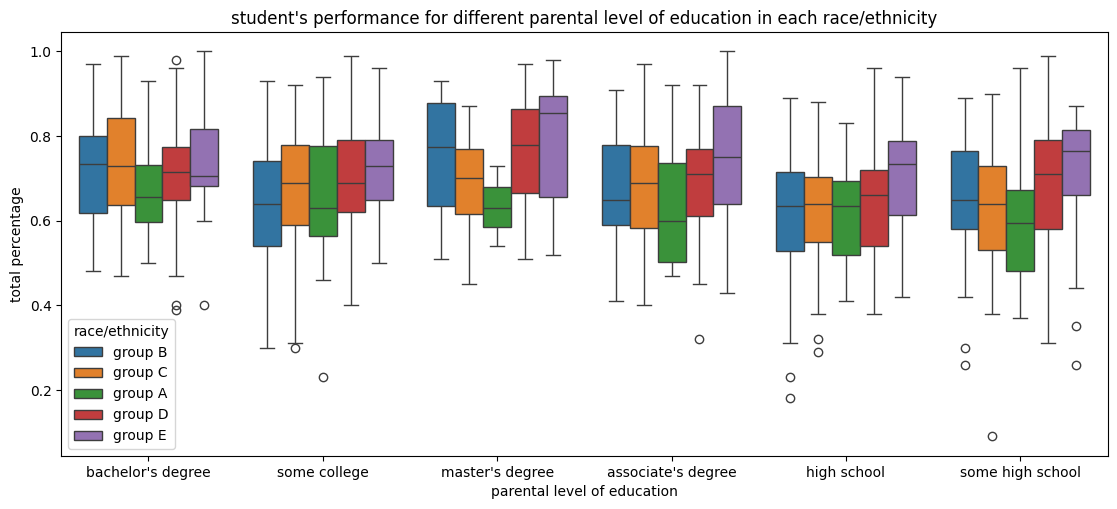

In [164]:
plt.figure(figsize= (13.5, 5.5))
plt.title("student's performance for different parental level of education in each race/ethnicity")
sns.boxplot(x= dataframe['parental level of education'],
            y= dataframe['total percentage'],
            hue= dataframe['race/ethnicity']);

##### observations:
- The general performance of students is higher than rest, where parental level of education is master's degree.
- Although there is a slight correlation between the parental level of education and student's performance, but in a bigger picture, parental level of education doesn't hold much significance to the student's performance.
- Besides master's degree, other education segments show large variation in total percentage data.
- On an average, group E has performed the best in each educational segment, whereas, group A has performed the worst.
- The group A has the least variance in the prformance data, whereas, group B and D can be seen to have the highest variance.

#### status with lunch as a function

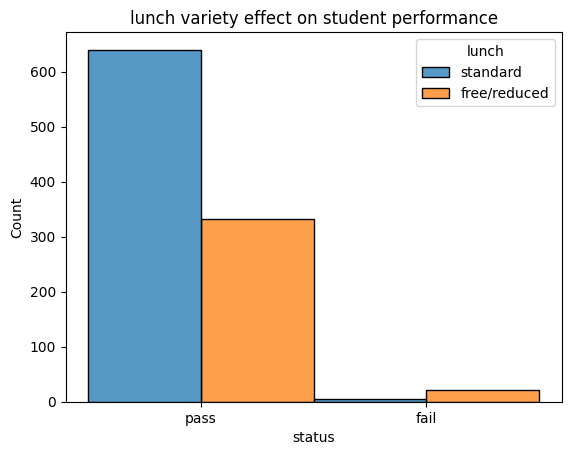

In [162]:
plt.title('lunch variety effect on student performance')
sns.histplot(x= dataframe['status'],
             hue= dataframe['lunch'],
             multiple= 'dodge');

##### observations:
- Students with standard grade lunch tend to perform better than students with free/reduced grade lunch.

#### status with test preparation course as a function

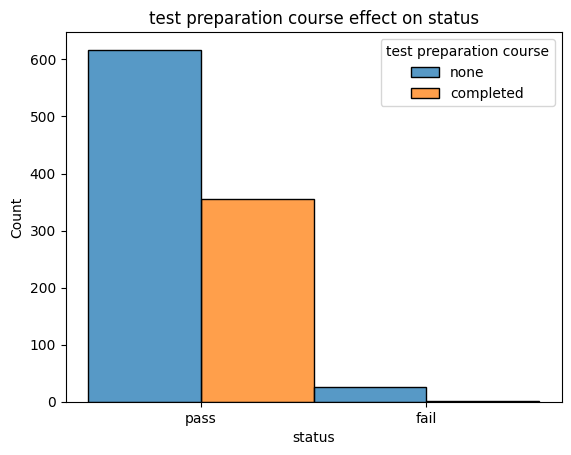

In [161]:
plt.title('test preparation course effect on status')
sns.histplot(x= dataframe['status'],
             hue= dataframe['test preparation course'],
             multiple= 'dodge');

##### Observations:
- The majority of students have not completed/submitted the test preparation course.
- The ratio of pass vs. fail students who have completed the test preparation course is higher than the ratio of pass vs. fail students who have not completed the same.

#### status with race/ethnicity as a function

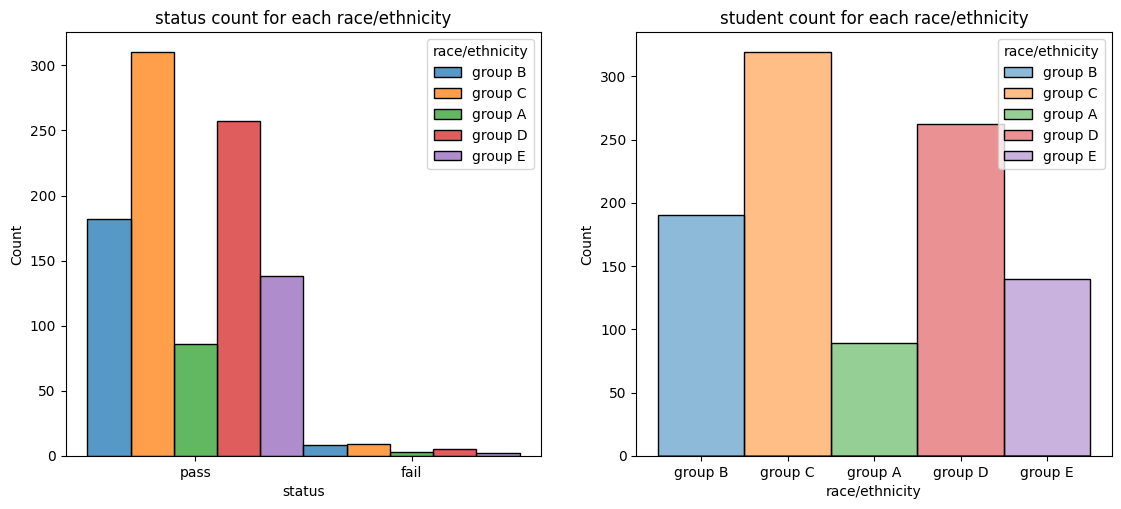

In [160]:
plt.figure(figsize= (13.5,5.5))

# subplot 1
plt.subplot(1,2,1)
sns.histplot(x= dataframe['status'],
             hue= dataframe['race/ethnicity'],
             multiple= 'dodge')
plt.title('status count for each race/ethnicity')

# subplot 2
plt.subplot(1,2,2)
sns.histplot(x= dataframe['race/ethnicity'],
             hue= dataframe['race/ethnicity'])
plt.title('student count for each race/ethnicity');